In [1]:
import os

In [2]:
#to get the file path in notebooks
# __file__ path no work in Jupiter note
#https://stackoverflow.com/questions/39125532/file-does-not-exist-in-jupyter-notebook
current_dir=os.path.abspath('')

Load dataset

In [3]:
# download the tiny shakespeare dataset
sufix="32maps_nonalpha"
folder=f"microstate_{sufix}_2sE_dataset_pretokenize"
input_file_path = os.path.join(os.path.dirname(current_dir), f"data/{folder}/output_{sufix}_2sE.train.txt")
print(input_file_path)

/home/rjarpa/code/nanoGPT/data/microstate_32maps_nonalpha_2sE_dataset_pretokenize/output_32maps_nonalpha_2sE.train.txt


In [4]:
# Read the text file and store each line as an element in a list
def read_text_file_to_list(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        lines = [line.strip() for line in lines]
    return lines


In [5]:
# Replace 'file_path.txt' with the actual path to your text file
dataset = read_text_file_to_list(input_file_path)

# Print the list
#print(dataset)

**Load tokenizer**

In [6]:
token_file_path = f"{os.path.dirname(current_dir)}/data/tokenizer-output-{sufix}-2sE.json"

In [7]:
#https://huggingface.co/docs/transformers/fast_tokenizers

from transformers import PreTrainedTokenizerFast
tokenizer = PreTrainedTokenizerFast(tokenizer_file=token_file_path)


/opt/anaconda3/envs/gpt/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:


# Tokenize the dataset and count the occurrences
vocab_count = {}
for sentence in dataset:
    encoding = tokenizer.encode(sentence)
    #tokens = encoding.tokens
    for token in encoding:
        vocab_count[token] = vocab_count.get(token, 0) + 1


In [9]:
# Tokenize the dataset and count the occurrences
vocab_count_decoded = {}
for sentence in dataset:
    encoding = tokenizer.encode(sentence)
    #tokens = encoding.tokens
    for token in encoding:
        vocab_count_decoded[tokenizer.decode(token)] = vocab_count_decoded.get(tokenizer.decode(token), 0) + 1


In [10]:
# Optionally, you can sort the vocabulary by count
sorted_vocab_count = {k: v for k, v in sorted(vocab_count.items(), key=lambda item: item[1], reverse=True)}


In [11]:
# Optionally, you can sort the vocabulary by count
sorted_vocab_count_decoded = {k: v for k, v in sorted(vocab_count_decoded.items(), key=lambda item: item[1], reverse=True)}


In [12]:
# Print the result
for token, count in sorted_vocab_count_decoded.items():
    print(f"{token}: {count}")

RRR: 2103
WWW: 2046
KKK: 1985
```: 1981
III: 1968
PPPP: 1930
DDDD: 1906
EEE: 1905
[[[: 1903
]]]]: 1901
LLL: 1895
^^^^: 1893
YYYY: 1886
^^^: 1881
IIII: 1881
AAA: 1877
NNN: 1871
HH: 1860
YY: 1857
JJJ: 1845
AA: 1840
KKKK: 1839
QQQ: 1839
VV: 1839
GG: 1839
WWWW: 1837
XXX: 1831
\\\: 1829
BB: 1828
````: 1826
SS: 1825
JJJJ: 1825
VVV: 1819
\\: 1813
QQ: 1812
TTT: 1811
WW: 1811
AAAA: 1811
OOOO: 1810
FF: 1809
EEEE: 1809
RRRR: 1809
[[: 1804
MM: 1802
CCC: 1800
GGGG: 1800
[[[[: 1799
VVVV: 1797
JJ: 1797
ZZ: 1796
CC: 1793
UUUU: 1790
__: 1788
UU: 1788
OO: 1778
PP: 1777
]]: 1775
SSSS: 1774
LLLL: 1769
^^: 1767
NN: 1766
XXXX: 1766
DD: 1757
]]]: 1751
___: 1751
OOO: 1750
NNNN: 1740
TT: 1738
LL: 1736
ZZZ: 1735
TTTT: 1729
\\\\: 1729
CCCC: 1729
ZZZZ: 1725
SSS: 1723
EE: 1705
II: 1686
____: 1685
UUU: 1679
XX: 1674
MMMM: 1666
HHH: 1664
``: 1655
HHHH: 1651
BBB: 1615
QQQQ: 1610
MMM: 1592
BBBB: 1591
KK: 1575
SSSSS: 1573
YYY: 1572
DDD: 1560
PPP: 1552
GGGGG: 1545
DDDDD: 1537
RR: 1530
YYYYY: 1525
^^^^^: 1524
]]]]]: 1517

In [13]:
# Print the result
for token, count in sorted_vocab_count.items():
    print(f"{token}: {count}")
    

133: 2103
126: 2046
131: 1985
132: 1981
127: 1968
89: 1930
96: 1906
130: 1905
123: 1903
81: 1901
117: 1895
91: 1893
85: 1886
129: 1881
90: 1881
105: 1877
119: 1871
41: 1860
48: 1857
124: 1845
38: 1840
95: 1839
111: 1839
50: 1839
58: 1839
98: 1837
122: 1831
113: 1829
39: 1828
99: 1826
43: 1825
88: 1825
116: 1819
45: 1813
54: 1812
120: 1811
64: 1811
70: 1811
80: 1810
40: 1809
101: 1809
97: 1809
62: 1804
42: 1802
114: 1800
93: 1800
94: 1799
78: 1797
57: 1797
66: 1796
51: 1793
77: 1790
61: 1788
49: 1788
46: 1778
56: 1777
47: 1775
76: 1774
82: 1769
60: 1767
53: 1766
74: 1766
63: 1757
109: 1751
125: 1751
108: 1750
83: 1740
55: 1738
52: 1736
128: 1735
86: 1729
79: 1729
84: 1729
100: 1725
107: 1723
67: 1705
59: 1686
92: 1685
115: 1679
44: 1674
75: 1666
102: 1664
68: 1655
73: 1651
104: 1615
87: 1610
110: 1592
71: 1591
65: 1575
143: 1573
106: 1572
118: 1560
121: 1552
153: 1545
159: 1537
69: 1530
142: 1525
155: 1524
141: 1517
156: 1511
139: 1498
162: 1497
150: 1496
136: 1495
157: 1486
149: 1475
1

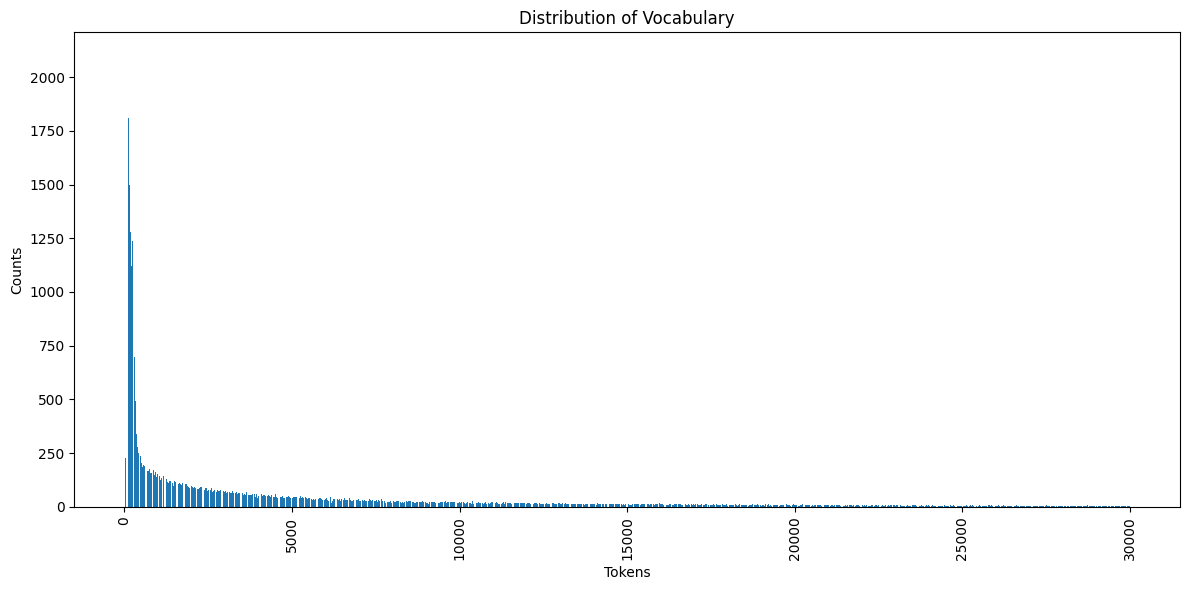

In [14]:
import matplotlib.pyplot as plt

# Your code to calculate sorted_vocab_count goes here...

# Convert the sorted_vocab_count dictionary into two lists: tokens and counts
tokens, counts = zip(*sorted_vocab_count.items())

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.bar(tokens, counts)
plt.xlabel("Tokens")
plt.ylabel("Counts")
plt.title("Distribution of Vocabulary")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [15]:
# Filter vocab_count to include items with at least 100 occurrences
min_occurrences = 100
filtered_vocab_count = {token: count for token, count in sorted_vocab_count_decoded.items() if count >= min_occurrences}


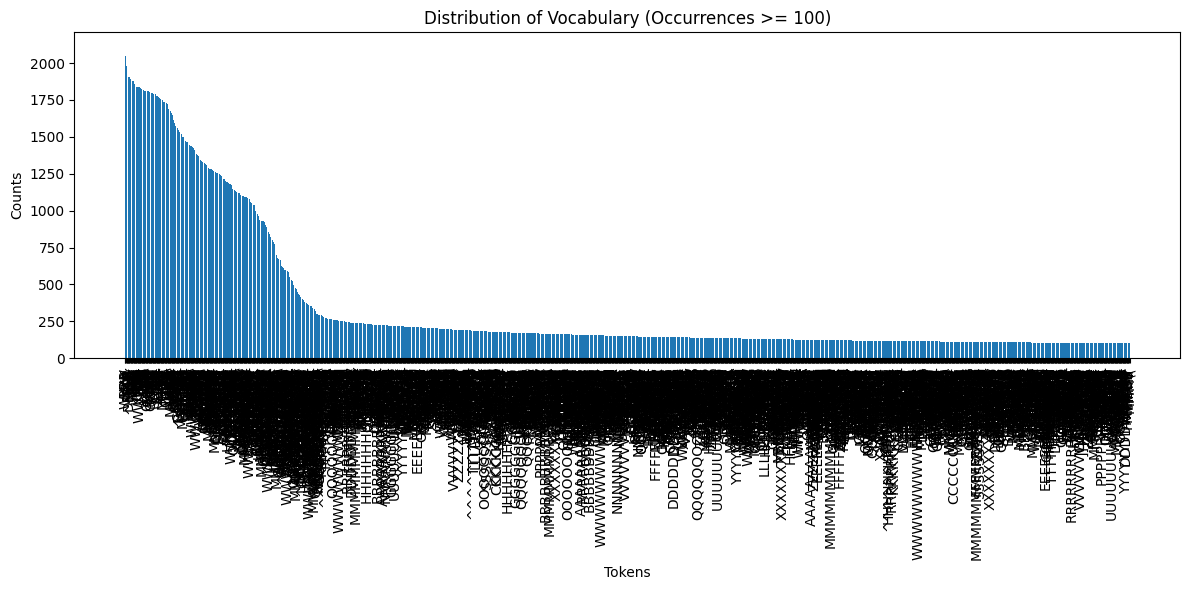

In [16]:
# Convert the filtered_vocab_count dictionary into two lists: tokens and counts
tokens, counts = zip(*filtered_vocab_count.items())

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.bar(tokens, counts)
plt.xlabel("Tokens")
plt.ylabel("Counts")
plt.title(f"Distribution of Vocabulary (Occurrences >= {min_occurrences})")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [17]:
print(f"filtered_vocab_count: {len(filtered_vocab_count)}")
print(f"vocab_count_decoded: {len(vocab_count_decoded)}")

aprox_words=round(len(filtered_vocab_count)*100/95)
print(f"recommended size vocab: {aprox_words}")

filtered_vocab_count: 1745
vocab_count_decoded: 29687
recommended size vocab: 1837


In [18]:
#train has 3,020,525 tokens
#val has 332,993 tokens

In [19]:
#whole dataset
#filtered_vocab_count: 3637
#vocab_count_decoded: 29572
#recommended size vocab: 3828